In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from os.path import join
import sys
import h5py
import pandas as pd
import pickle
from time import time
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('classic')
from tqdm import tqdm
from scipy.io import loadmat
from utils import *
from core_decoding import computePerformance
from scipy.stats import pearsonr

/home/ansuini/.local/envs/pytorch/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
ROOT = join('/home','ansuini','repos','Decoding')
sys.path.append(join(ROOT))
os.chdir(join(ROOT,'notebooks') )
date = '2018_01_10'
results_folder = join(ROOT, 'notebooks','results',date)
figs_folder = join(ROOT, 'notebooks','figs',date)

In [4]:
stimFeatures = parseContinuousStimFeatures()
print(stimFeatures.keys())

dict_keys(['orientation', 'posx', 'posy', 'eccentricity', 'area', 'luminosity'])


# Parameters

In [5]:
COMPUTE=True
SAVE=True

np.seed = 1101
nstim = 1440
fraction = 0.2
ntest = int(np.floor(nstim*fraction))
ntrain = nstim-ntest
print('n. stim training : {}'.format(ntrain))
print('n. stim test : {}'.format(ntest))
epsilon = 0.1
nfolds = 5
Cs = np.logspace(-6,0.5,50)
param_grid = {'C' : Cs}
M = 30

n. stim training : 1152
n. stim test : 288


# Decoding continuous variables

In [6]:
printUnitsResume()

Controls
SU  :  [52, 6]
MUA :  [288, 96]
ALL :  [340, 102]

Experimentals
SU  :  [31, 105]
MUA :  [156, 254]
ALL :  [187, 359]

Naive
SU  :  [46, 82]
MUA :  [145, 279]
ALL :  [191, 361]



In [7]:
#nunits = {}
#nunits['su'] = 31 # the second smallest
#nunits['mua'] = 96
#nunits['all'] = 102

nunits = {}
nunits['su'] = 31 # the second smallest
nunits['mua'] = 80
nunits['all'] = 90

In [8]:
#TypeUnits = ['su']
#TargetAreas = ['ll']
#Experiments = ['Controls']

In [ ]:
if COMPUTE : 
    for exp in Experiments:
        for area in TargetAreas:
            for typeunit in TypeUnits:
                X = loadFiringRates(exp,area,typeunit)
                ntot = X.shape[1]            
                for obs in stimFeatures.keys():
                    y = stimFeatures[obs]                              
                    # iterate over random subsamples

                    print('Processing : {} : {} : {} : {}'.format(exp,area,typeunit,obs) )
                    R = []
                    for m in tqdm(range(M)): 

                        if ntot > nunits[typeunit]:
                            perm = np.random.permutation(ntot)[:nunits[typeunit]]
                            X_tmp = X[:,perm]
                        else:
                            X_tmp = X
                        R.append(computePerformance(X_tmp,y,param_grid))

                    #compute average performance
                    rs = [pearsonr(r[2],r[3])[0] for r in R]
                    #mean_r = np.mean(rs)
                    #std_r = np.std(rs)

                    print(rs)

                    #save
                    if SAVE:
                        pickle.dump(R, open(join(ROOT,
                             'notebooks',
                             'results', 
                              exp + '_' + area + '_' + typeunit + '_' + obs + '.p'), 'wb' ) )


  0%|          | 0/30 [00:00<?, ?it/s]

Processing : Controls : v1 : su : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[0.04897179859158314, 0.06603813147712059, 0.05898240622404628, 0.02310493032781353, -0.06025866420491106, 0.028584826100974917, -0.0024581053141956638, 0.003363641466718583, 0.009938053419936376, -0.017582286967669097, -0.016933155447703428, 0.011160477060874611, 0.016092297917607874, -0.01018084694201586, -0.04652525540933934, 0.019548971215662545, 0.0012477132080862562, 0.004230543224157637, 0.016793852196776534, -0.048982185258667106, 0.0061006720351392645, 0.008508806655113969, -0.023640492365600632, 0.022439894217383214, -0.04890053138845947, 0.04743426332504494, -0.03266103719870741, 0.0072258707931142484, 0.006737269665971012, 0.01916832867550267]
Processing : Controls : v1 : su : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.6235190374357684, 0.4405169957008225, 0.5710534318174645, 0.49552200184552514, 0.5623658888491282, 0.6451618869978845, 0.5789130961973492, 0.5482623025761462, 0.5506341614078871, 0.5845638089166433, 0.5193815656106671, 0.5224497594487001, 0.479054705881801, 0.6047100942143633, 0.5650537165776576, 0.5564140407652152, 0.5513767373980911, 0.6177897817435997, 0.5439115780335608, 0.6048324668329635, 0.5792668973069035, 0.631890343610784, 0.5677705972358573, 0.5496829568364698, 0.4846101984409625, 0.4986279543048053, 0.5306418591877081, 0.5792491072245153, 0.5235209139893198, 0.5691934077620875]
Processing : Controls : v1 : su : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.1651490386110597, 0.11498625585854565, 0.08577105188355061, 0.15196982475054685, 0.20339111349578576, 0.16966528944160428, 0.17981121592363902, 0.1448006718784337, 0.2267868186638701, 0.10395962519780803, 0.1679355099999856, 0.18188461326198377, 0.14578606614023773, 0.16945921816119439, 0.17535675899182404, 0.2283235472372684, 0.14718923455388458, 0.1389196607152951, 0.16040050096267316, 0.1436432032765134, 0.1870650965043798, 0.1641414379381925, 0.18669676019359366, 0.16350924279361423, 0.1721328687542174, 0.17405845953567878, 0.14532320124101689, 0.1407811078950084, 0.125860397735335, 0.1754277231851585]
Processing : Controls : v1 : su : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.24291289906321756, 0.21063340801397754, 0.2151366783689413, 0.18672452974406953, 0.23149476433286273, 0.2221855617111005, 0.23733770412835983, 0.23977656204234454, 0.23977979674712846, 0.24386453851383336, 0.25983686295859154, 0.20528758966885233, 0.21311805115713178, 0.21909815152750825, 0.18595852087239267, 0.22725051781105246, 0.20728441918702448, 0.20934267083048214, 0.22325186671153457, 0.22163576086856085, 0.21360359265056644, 0.24334674912241608, 0.2596383189690004, 0.20039536855426757, 0.22765619492841857, 0.21044405565801202, 0.21468568590459047, 0.2148266548071825, 0.1818962225813576, 0.1925860314219791]
Processing : Controls : v1 : su : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.31024423713177807, 0.28202569292182134, 0.3135483680900015, 0.3147212832697102, 0.33975407984485295, 0.37078453816802975, 0.324462520865706, 0.2493617328698809, 0.3343700275999076, 0.2536685572278118, 0.3048892882080564, 0.2923349716930234, 0.3390219409625328, 0.31843114589982163, 0.3411791542203361, 0.307364043195003, 0.3111795248468115, 0.2065405579882376, 0.2875064465726984, 0.2909673613910505, 0.33825645882845595, 0.283532310835474, 0.32103643976046947, 0.3353483167545417, 0.3741041827037758, 0.31086240604165494, 0.3314630498576668, 0.28285753121843743, 0.29816368806516713, 0.29955332442864663]
Processing : Controls : v1 : su : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.550644048821183, 0.5276359905024303, 0.46479469244249066, 0.5452675071993581, 0.5472017930863791, 0.5057019525742074, 0.532645758416203, 0.5110524955140409, 0.5506216200883967, 0.521973271428799, 0.5995163857506965, 0.5540298582105818, 0.5487808849886532, 0.6074522638296559, 0.5468730053759089, 0.5207061364169875, 0.5352408538041499, 0.5577576356776395, 0.5432273246186418, 0.5524507894026888, 0.557374307935471, 0.5528014992115814, 0.5790084921715041, 0.6256844843826541, 0.5305407076391566, 0.5836010174307232, 0.4974853557164794, 0.5172501320591025, 0.5430125025420133, 0.5064246025690852]
Processing : Controls : v1 : mua : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[0.09162135470987204, 0.005911347688135591, 0.017664058386464877, 0.0010665937035699373, 0.03081489739548137, 0.0683944259066572, 0.002534638072353992, 0.05400278512562667, 0.07523014958635088, -0.008375797268696474, 0.032256129492620064, -0.014365205080212872, 0.08418630541243857, 0.08633811747956345, 0.03877781464528866, 0.056803694506305645, 0.027349550621464956, -0.010529099038549268, 0.04756690271659451, 0.03729398537555418, 0.005619269640084192, 0.06998144015986507, 0.05025796702326657, 0.00011131720143888191, 0.06853062546002289, 0.02605774713643807, -0.025185049340632006, 0.015844648315290005, -0.04219968657756745, 0.008348150689575581]
Processing : Controls : v1 : mua : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.6166689319790337, 0.7059714062462129, 0.6892678838683027, 0.6822943455234547, 0.6572877553475105, 0.6270130111584314, 0.486580335786196, 0.5444907419112256, 0.6087672286440553, 0.6814929390471375, 0.5741591764393899, 0.7216759337976846, 0.6746900133675353, 0.6965359511989165, 0.7003402048684626, 0.6571453853553546, 0.6177726821898712, 0.7434248186767688, 0.7040308195122413, 0.7194992240274614, 0.56666220721937, 0.7241595340227391, 0.6694848008651297, 0.6760521429783671, 0.5644136585627267, 0.6875097509536775, 0.6566998220232018, 0.5459989348243094, 0.7198999911127032, 0.4867278955724043]
Processing : Controls : v1 : mua : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.4915429295164042, 0.3950527502975895, 0.44536867181675954, 0.32850192953426793, 0.3511940887618996, 0.4451579918747901, 0.3667450041099458, 0.41874779163459297, 0.47105513645323005, 0.3916718481747687, 0.3606993506073951, 0.27122402247008304, 0.38138030425402475, 0.4832564802399961, 0.39574108527800184, 0.41714075524872923, 0.37817641016005443, 0.3870732317670381, 0.2798039557996375, 0.29406761221902, 0.40871978603617637, 0.3858319713407587, 0.41479960902682084, 0.4056882707594498, 0.35696200858236243, 0.2894625167057116, 0.3793543542395547, 0.3043513164977242, 0.40220117363364416, 0.34063937298711594]
Processing : Controls : v1 : mua : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.2952791738527469, 0.3102122237830833, 0.3364131022674899, 0.31408869655083943, 0.32640048314276743, 0.33769871096889265, 0.35556011576866164, 0.29562427911259753, 0.3069724847738212, 0.2981214454363591, 0.3232576451976803, 0.2818796069304122, 0.3178863512291003, 0.31656411131406326, 0.31558490242511317, 0.3127534581624231, 0.3140024422370203, 0.3315264858800421, 0.3132396668867703, 0.2977560817019945, 0.3367344060691533, 0.3035100659642332, 0.29185268307253676, 0.30731182200404006, 0.2960198390486181, 0.31081265621964793, 0.31870296293156936, 0.333147813088559, 0.33232843122652633, 0.30278257584733675]
Processing : Controls : v1 : mua : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.44662162918493753, 0.42654452878954524, 0.45172798450904317, 0.41441974126877174, 0.44187755266409195, 0.4540769139075349, 0.43837755306187914, 0.46694008109097185, 0.43054890772998483, 0.4185349137823039, 0.4553977348430849, 0.42146995327160625, 0.43423857683670564, 0.42702759369001786, 0.46849778930498326, 0.4424011274212989, 0.45792833558373697, 0.4587404308184988, 0.4418430072664248, 0.4576458285950938, 0.4651196750184982, 0.4409702666048994, 0.44493007047947897, 0.43786747320844216, 0.43407480384494346, 0.47417674480394156, 0.4430065890963385, 0.4321245335584047, 0.4690927357606536, 0.44344086547596356]
Processing : Controls : v1 : mua : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.4991213191560947, 0.5417620885974999, 0.5066317892641817, 0.5988389883075932, 0.5323451856181824, 0.5374895845388379, 0.5449350968090715, 0.5066657966010625, 0.5246853496276911, 0.520701054083195, 0.5952039047333684, 0.5567122793566717, 0.5254792785923923, 0.5074686759355092, 0.5041034139964286, 0.5160284500996468, 0.4329523337480291, 0.5686423567172285, 0.5131102836679314, 0.5054708373832851, 0.5697860867067334, 0.5420363516145275, 0.49356839955351745, 0.536783346707483, 0.4752791456827001, 0.4504972494924991, 0.5901538408480121, 0.5346118404971816, 0.5476287241894919, 0.473185672223555]
Processing : Controls : v1 : all : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[0.05634163147671626, 0.00302147360910765, -0.010869351803840637, -0.0054473350452280194, 0.06702590480943249, 0.04696548326017849, 0.04777734246334228, 0.04583038853323333, 0.005227901889978939, 0.06323863772906017, 0.06869202358245602, 0.06996039411585107, 0.02682885390134542, 0.018195398460932575, 0.048732004461619155, -0.02573115450080725, 0.047894803273792884, 0.025575721685294255, 0.012083763206280232, 0.06566858607304178, -0.00825038074042321, 0.00828126138870851, 0.053367240385081775, 0.018921506776342606, -0.021609040166550488, -0.05283903632393368, 0.01726189757590375, 0.005811606080258149, -0.004689851261921203, 0.012390390129925896]
Processing : Controls : v1 : all : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.753960421058098, 0.6649830176601594, 0.6841275410412189, 0.6964510253411514, 0.718360719896105, 0.6319389917445253, 0.7084516610741717, 0.6523607364421797, 0.7012161858854702, 0.6065917563613568, 0.7269761479458535, 0.6473107001100883, 0.7010400820130214, 0.7287574243816598, 0.6857212536174654, 0.6526449503262512, 0.6803967225255925, 0.6372374221073753, 0.7307652095413338, 0.5752019469809123, 0.6877798534345301, 0.587735920079368, 0.56151238998711, 0.7533074394963652, 0.6110392151473456, 0.711581390606322, 0.6433103092209287, 0.7198902590635436, 0.704093551855929, 0.7394972958754257]
Processing : Controls : v1 : all : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.4765842243019781, 0.4130782742784757, 0.3293148043107113, 0.440695105359157, 0.3815642564264576, 0.3348481096596239, 0.35712387938747836, 0.315114086562592, 0.3609104054638848, 0.3452577181953952, 0.46513258168506283, 0.42815543580339643, 0.260173877759422, 0.4538176539256987, 0.4298766983320232, 0.30974285477293706, 0.3949040376423913, 0.4077072664848684, 0.2708185509091391, 0.4093126528513027, 0.35365253591785395, 0.30106652593059086, 0.40333980786107837, 0.2738285424695408, 0.3967042518838231, 0.362182352200947, 0.4732664360490621, 0.43801759133528345, 0.34503093436268756, 0.2670581718924671]
Processing : Controls : v1 : all : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.29239570061655606, 0.30766020715050435, 0.3069283415719771, 0.30802822792666057, 0.28770624139300777, 0.2919710458619767, 0.32877411464334105, 0.3277431483723389, 0.3445242098527641, 0.3372737822041073, 0.30847554425226675, 0.3128936431118549, 0.3049769919980991, 0.32007092464886483, 0.32562776119599396, 0.3175192380566794, 0.3250359669531655, 0.31164982194424146, 0.2846995273473422, 0.33044178102304067, 0.3137228972288255, 0.33964036927587316, 0.31638210380735177, 0.33307685688805494, 0.3064788559276566, 0.3091151018154702, 0.3401831423871297, 0.3359118111455453, 0.3484500770446468, 0.32927421311085686]
Processing : Controls : v1 : all : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.44042482671001915, 0.45865545456888357, 0.4279660025026189, 0.43326986299939685, 0.45577613821465035, 0.42089709979084183, 0.4547550434607657, 0.42731341160565073, 0.41826329191840733, 0.44820550158517347, 0.43442968706137597, 0.4508171997103093, 0.411795928400914, 0.429688301647964, 0.43222067622660315, 0.43338357422273205, 0.457215990478298, 0.4267585892152871, 0.43039731718073665, 0.4557949150724664, 0.4289725721867953, 0.45779876825262344, 0.4459269824106285, 0.42413933589573594, 0.4319589106357095, 0.459288535867209, 0.473814895656583, 0.461722723208938, 0.43900530168010254, 0.41966095428116906]
Processing : Controls : v1 : all : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.5619796211109985, 0.5797058083655381, 0.5436381527256998, 0.5461970990968548, 0.5008629302009455, 0.48908397750306815, 0.5271627717517202, 0.4958836932587086, 0.5042266558501723, 0.5666319146873603, 0.5599328251031299, 0.5894702359230591, 0.49418213944003736, 0.5288291796674139, 0.5656809239431181, 0.5164416095627006, 0.5853654377132121, 0.5448134746650332, 0.5330675930862718, 0.5543582517808044, 0.4517263295431553, 0.5053246588300057, 0.453022406024185, 0.5470871920534197, 0.5429215678624714, 0.6008651743807338, 0.5591686007921779, 0.5387720923584526, 0.5329569417695654, 0.6071552514371765]
Processing : Controls : ll : su : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[-0.002428080864894396, -0.01635518400484824, -0.004763875102290393, -0.048381175882189126, -0.015677355261808676, -0.04322436293366588, 0.003367788586644771, 0.004449804960002363, -0.013939567540437736, 0.02828876903421772, -0.025959068533073507, -0.02344642339576998, -0.03663349639730736, -0.032677277819707855, -0.03894473122763414, -0.03891157508831496, -0.02186185471140927, -0.028849424114680278, -0.04463181940058243, -0.007684610536314053, -0.042729606688987884, -0.028792089181009704, -0.017956731653634716, 0.0008667653404511859, -0.025824051744402787, -0.028048968262333954, -0.06715536035986373, -0.02360834564549755, 0.004552577138969132, -0.013023346613730055]
Processing : Controls : ll : su : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.03961021057232988, 0.04514748684624781, 0.01280132817527995, 0.06262725004559178, 0.07215407385577827, 0.015040424051119227, -0.009207911328579758, 0.05785779564675111, -0.006736656021972458, 0.04118524628848559, 0.048788689365189784, 0.0027538327164898066, -0.009027278993471577, 0.030629957334479065, 0.04404578457246747, 0.0674455647948568, 0.020191324374692454, 0.0288706099119054, -0.004753380330107141, 0.043508617468066065, 0.04864529503576138, -0.026526967173318594, 0.061638539540876176, -0.014459196041302698, -0.02558268052771391, 0.03285660204734743, 0.05818462979792325, 0.0548941062316053, 0.026177207400133348, 0.0654415461372587]
Processing : Controls : ll : su : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.1849852579845345, 0.10819673373802602, 0.13303821315077877, 0.12518869452286618, 0.13241720926239123, 0.1501502288228832, 0.13927748653296657, 0.19563312581903974, 0.17537240230269283, 0.14014571795293934, 0.14739701812224398, 0.11841283309902917, 0.15655452974425194, 0.135719190864628, 0.1288050412230975, 0.13058624008837752, 0.14385204936602594, 0.058097419698645895, 0.13672493733675842, 0.13573480502304006, 0.13125543679581067, 0.15383142347227724, 0.18002539337349158, 0.1273244139506593, 0.13329225090820626, 0.13752729917855508, 0.15840262570326286, 0.1015324475852813, 0.13799719343090833, 0.14535749199713163]
Processing : Controls : ll : su : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.0036657028762172757, 0.07838011963709281, 0.034456166827989125, 0.10650930185708203, 0.07566768928324251, 0.002474584400870227, 0.03485143395950849, 0.07462321189344374, 0.09150377114277464, 0.023159283467530736, 0.0823822987239844, 0.09817186856210425, 0.07715564406019129, 0.027735883325901874, 0.09387771891630403, -0.009862975864023536, 0.10139391844457792, 0.04786918714458428, 0.05934801349819197, 0.08516024103871549, 0.06442846170010064, 0.08615211124863256, 0.10078645197099256, 0.04924151419286588, 0.11838882788334398, 0.10540045162447059, 0.06819466275326344, 0.11357169707214289, 0.07594689545407203, -0.030362194512269843]
Processing : Controls : ll : su : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.23790675383867635, 0.1699521087764256, 0.19196032655062592, 0.19404356532081896, 0.17733515546693904, 0.23208064808594484, 0.18853171804754157, 0.17938426959625445, 0.22296222808163874, 0.1986593035225742, 0.18198286196150104, 0.21286092971984255, 0.21480287643552481, 0.19637195870696303, 0.24151045650714303, 0.19004492308542614, 0.1713430463652483, 0.15196921153124499, 0.23559828377637984, 0.19958860328204947, 0.2195841075725961, 0.14545297356633438, 0.18980318776437163, 0.17788411125900475, 0.22103516288864355, 0.11130463508249087, 0.2029943548384988, 0.1475412020666453, 0.21320430482941807, 0.17649270135043463]
Processing : Controls : ll : su : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.1260345684274723, 0.13879475527176724, 0.12889803810377315, 0.08562863873785798, 0.11037036361506176, 0.11490767763826501, 0.09503975752008563, 0.05985223276253393, 0.11003045558252911, 0.13569044709211608, 0.15960987528079842, 0.10844099463777042, 0.15270377490962397, 0.16830184482080812, 0.13844647760793272, 0.14222158745690078, 0.12164470919188342, 0.09706807389927605, 0.17911335375852439, 0.06226424330680389, 0.11772754058249722, 0.12193556603186019, 0.0893030535791818, 0.1196156981221635, 0.1064416978451783, 0.14465915481262093, 0.1566098198656333, 0.11159192405494232, 0.10642871729574567, 0.1143211545011771]
Processing : Controls : ll : mua : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[-0.0021097952397108517, 0.051813541173046165, 0.009176686964851063, 0.015481110686285986, 0.02474297447399206, -0.0068331125823852664, -0.05444386033024059, 0.03303382169041777, 0.030006029212783107, 0.006735263901444386, 0.03542657280988601, 0.025222345109897886, 0.015873292781279365, -0.00946229271551353, 0.013069303194603999, -0.02745378515703083, -0.003867973825262431, 0.0028659551130510662, 0.026151404196433973, -0.007865519174740552, -0.023987256116270873, 0.02659727416106767, -0.03802896577827224, 0.042347009516608525, 0.007184610323936594, 0.04706481019712895, 0.00670168915900893, 0.03428786591865287, 0.018014788769508357, 0.03322368319292787]
Processing : Controls : ll : mua : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.43694443273678646, 0.4925351561395033, 0.4962715448433399, 0.5102805409281387, 0.481946996587813, 0.4105132591643698, 0.44567098988164544, 0.49555514526990313, 0.44053928597021524, 0.48239872323983196, 0.4540461539647399, 0.4114956666000533, 0.45445113738780957, 0.5028735237359861, 0.458909116355015, 0.43779997535440446, 0.4720187273357085, 0.4720022187920317, 0.37297367806805054, 0.4771185567432578, 0.4735221981092988, 0.46133441712541423, 0.47875608348267307, 0.5333766304570262, 0.4715506747506438, 0.505669158013883, 0.5021709299833311, 0.5249446600122188, 0.47626373230896996, 0.5056994605698977]
Processing : Controls : ll : mua : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.2519372042125427, 0.3054365172579013, 0.27643378001292984, 0.19913278113600721, 0.15367088146794272, 0.2794227318617844, 0.17662831476093296, 0.22537885594827384, 0.21367522018918886, 0.26315828708805405, 0.29920541886573, 0.2164946901492718, 0.22020002583930387, 0.2237294675543436, 0.28580527001075756, 0.24807145726825153, 0.2821281771506258, 0.18149088041822006, 0.33817677201166135, 0.23713644379772408, 0.21642113558366857, 0.3131882633784439, 0.26788800524787326, 0.18358556167696594, 0.2611480974333051, 0.2763439833299879, 0.26342725794636523, 0.11784972726259577, 0.2663239866098459, 0.2620372919624641]
Processing : Controls : ll : mua : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.15578147116868024, 0.1428723941656385, 0.14515741512272934, 0.16273759597581938, 0.1517105275811258, 0.16380901731469488, 0.16475688502897276, 0.1422080064799588, -0.034073463751054675, 0.14211453654395464, 0.15309897794429053, 0.13840581241508365, 0.1285726515985633, 0.14406206020152126, 0.17282574847939272, 0.16233367159397563, 0.1452038559196396, 0.111386132807672, 0.16158913395004348, 0.13568514720543381, 0.15357152272380442, 0.14456267460657504, 0.14920581286642295, 0.14939566877485286, 0.1534397211602107, 0.14442802785347475, 0.1548286200204767, 0.17045654934561572, 0.14163560440682113, 0.14849699119759757]
Processing : Controls : ll : mua : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.3340227856436499, 0.321656429306531, 0.3017984729690016, 0.2977617454241651, 0.3332093240795338, 0.30207453624970393, 0.33432895337326, 0.3348518260985724, 0.34902977253867995, 0.32511405610722455, 0.31808199410487553, 0.3376366850267294, 0.334331138372396, 0.3076584749322846, 0.3465543566457737, 0.3262378471858912, 0.3217188065717642, 0.3432050996330814, 0.31191445161170567, 0.37244528784820347, 0.3009223639380761, 0.32775777330298256, 0.30724203792142035, 0.3661771303963932, 0.33465869350925653, 0.35749424841234034, 0.32444345595385005, 0.3332730694447559, 0.3075530127994732, 0.3253993714438927]
Processing : Controls : ll : mua : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.20612781632390775, 0.3257570129878508, 0.19765671267728457, 0.23807528036950967, 0.17101394178390872, 0.3064707628660799, 0.2617167687174105, 0.21002051135931632, 0.32250850122530034, 0.23221771543524272, 0.1905734237839431, 0.24167387497947096, 0.23363701114973615, 0.2528014420939209, 0.25324793554240493, 0.19421203521707345, 0.22270583964354074, 0.3170652258922243, 0.21687782905690003, 0.2261560830639668, 0.21448100529641556, 0.22931658683615105, 0.2186970396152036, 0.24154430479165906, 0.24655714831944583, 0.22922887834094913, 0.24157701696957956, 0.19616264961598953, 0.2926503108170181, 0.17803287280239388]
Processing : Controls : ll : all : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[-0.04418900956404742, -0.02883792414038513, 0.009576547097025035, 0.02793782942052502, -0.00826001257922865, 0.05904661779552907, 0.04056935913953964, 0.04438027463258445, -0.0325820694016002, -0.07341943727309386, 0.032922153020044205, -0.03886677155145531, 0.033548147851945306, 0.010586184413821875, -0.01612815177035324, -0.02243157948445095, 0.01888152066581334, 0.03418980672011489, -0.013919327103963784, 0.018842229005861015, -0.0012236605642156838, 0.01107083041084462, 0.04213691923647093, -0.001939510892406739, -0.02114193895674143, 0.010180695740380118, 0.011982489291352384, 0.034097974812842435, -0.027070640699218117, 0.003245534377228526]
Processing : Controls : ll : all : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.5170990088939939, 0.4457986459841907, 0.5154834560657509, 0.4876185315543188, 0.5116716869503946, 0.5057390710443558, 0.4641579299859152, 0.3907444836730808, 0.5490352086876087, 0.4502001981725082, 0.5531999168537154, 0.4746023966470564, 0.4719808735212337, 0.5100358960689767, 0.4539060260740373, 0.4873545526599947, 0.46918170050876623, 0.4725206404703103, 0.4690556522107045, 0.4895901988940076, 0.5109746355090093, 0.5062336037138436, 0.4465723339512753, 0.5229970362916838, 0.45025751145677373, 0.5116174888779722, 0.4484652465576169, 0.46481778866505963, 0.4615488116148318, 0.5454770422092409]
Processing : Controls : ll : all : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.14557040678230881, 0.2993277773767041, 0.3283754477990223, 0.29072058171890297, 0.21620535885783043, 0.3780123014459991, 0.24970069371681455, 0.18752796448254405, 0.21992121805212086, 0.20896854576912338, 0.1683535113923612, 0.22009023359947572, 0.234844053489536, 0.27873622701789863, 0.21565485476616605, 0.17235412035845293, 0.16502849248881718, 0.1926953239298071, 0.259397447843326, 0.28120253428561826, 0.2454698292543003, 0.21879562034098968, 0.22496984505922474, 0.2935671305974228, 0.2763379262222933, 0.3254391910694327, 0.28360165828210254, 0.3275517320242989, 0.3097847952752131, 0.22291362993296399]
Processing : Controls : ll : all : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.16408596650260174, 0.16187702229332093, 0.14191094562216336, 0.18844004912692422, 0.16532235832465422, 0.1569329251741076, 0.14671564910144563, 0.14515483883330269, 0.1334857133874205, 0.16017387787662932, 0.16565364895885173, 0.18690368654944992, 0.13114577616642106, 0.15438501023721143, 0.1360491857353675, 0.141808514097727, 0.1604040216357104, 0.16958378313333727, 0.1478257158483485, 0.18617345030049298, 0.14203750256488196, 0.14575706730025575, 0.15334291784106505, 0.15247501156684395, 0.14855303890849736, 0.152459911699629, 0.14212508078647262, 0.15372096696723975, 0.16457710065191417, 0.15874175514419614]
Processing : Controls : ll : all : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.3924289830638765, 0.37151850078733945, 0.30928093908531434, 0.3663968858774638, 0.3107635636912567, 0.39064711408190483, 0.3670717108014875, 0.36114133262417514, 0.33032439042923745, 0.3136604959437308, 0.32224122527190824, 0.34043609520521223, 0.33357356593134785, 0.27929912295385384, 0.3610773241067781, 0.3690621534172956, 0.3493299974238848, 0.35425373874788907, 0.2931499942219745, 0.33316488975466907, 0.3465208938314419, 0.3273480970336599, 0.3077437407584184, 0.3175443230679491, 0.3035782130756649, 0.3532423724821023, 0.32315643917661774, 0.31674046732810357, 0.33304742370042095, 0.31111208152067477]
Processing : Controls : ll : all : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.24365305886760166, 0.1913515061807992, 0.21927896668597296, 0.3277661834038367, 0.27788879190128973, 0.24609268632238238, 0.25724202968572335, 0.27112068057645083, 0.21070308770312843, 0.2075038214204161, 0.2531932974256149, 0.19996172011225172, 0.2800700016794428, 0.18927013730184286, 0.2379466210828069, 0.23376757190275382, 0.22951773997765404, 0.2195849833231079, 0.2751557229022748, 0.3061120685697126, 0.1987931602018655, 0.21595339044313488, 0.22963934567596164, 0.229262275441683, 0.18553121268957606, 0.21634283537903387, 0.23900900052456087, 0.26640255139234814, 0.25331670032206627, 0.2692123977762979]
Processing : Experimentals : v1 : su : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[0.04826042225955106, -0.003029372030822674, -0.011308242552280684, 0.05702543657408815, 0.02207520631137371, 0.046911263415539806, 0.02338589857687619, 0.06181906146037548, 0.06572240776830772, 0.00982056795238091, 0.04847550290915482, 0.05933960205605145, -0.05377758534489234, 0.06652326693064595, 0.038750558612420626, 0.06553095446467502, -0.015194204268678343, -0.01736029688574087, -0.009811622216284399, -0.013744126241569688, 0.0157836357055234, 0.06268710069353431, 0.044476171729387844, 0.012946387168303038, 0.022228639183469213, 0.03829004268489751, 0.05495111197273473, 0.003978979489278585, 0.023092469750691107, -0.010440492934270892]
Processing : Experimentals : v1 : su : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.6207180981414684, 0.6283996119118583, 0.6670134106167175, 0.6732885444060511, 0.6500038777617525, 0.6483281685995878, 0.6462292666620877, 0.6459933885007784, 0.6610476758075923, 0.6597290826522492, 0.6535904191914256, 0.6722267878031226, 0.6611131110106371, 0.6818020579470585, 0.5222695792718175, 0.6608304858561653, 0.6246458698096737, 0.6678217792579426, 0.6524249622799574, 0.6646303722882836, 0.6736348016221354, 0.5877512066171483, 0.6617405185359602, 0.656948546219496, 0.6776099149449498, 0.6592260939874892, 0.6396957947166187, 0.6060007629294758, 0.6754652031996784, 0.6709463639897115]
Processing : Experimentals : v1 : su : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.1372180019045796, 0.22774373437276585, 0.08608201613834199, 0.11769195579232047, 0.18209789796270787, 0.1617492033889447, 0.15538648454227202, 0.11203724912009531, 0.16748001736943138, 0.22609923030225887, 0.14083919673383846, 0.16171438710413855, 0.21181552420627084, 0.1558633479695853, 0.1668884871591509, 0.16009067756525336, 0.1331770209643802, 0.1445843797651989, 0.09486478366652576, 0.08307113954129781, 0.18647467046306668, 0.158362573561141, 0.1871535570130179, 0.1561369832691997, 0.15909707762476702, 0.16336176847473682, 0.1584404688081453, 0.1685629743009655, 0.15355446764054392, 0.18806850889157423]
Processing : Experimentals : v1 : su : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.27480327217004863, 0.24792003455408174, 0.27959728561264435, 0.29346417772556, 0.27099738733386375, 0.28535055505216983, 0.27008799114355186, 0.25452780293772237, 0.26363248194414357, 0.2877942681528509, 0.27737786125168173, 0.2808657671187319, 0.2746719440519485, 0.24439420718203206, 0.2711802812511954, 0.26905675804884527, 0.2851769778052832, 0.27483367266525444, 0.2935976898824487, 0.25745914285542676, 0.2847811352152417, 0.2679666949742826, 0.2927942031110199, 0.273175791258994, 0.263409764659556, 0.2933412516378581, 0.25798571100121165, 0.2972652339847311, 0.2524699198686643, 0.3043903668046186]
Processing : Experimentals : v1 : su : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.4246754804575843, 0.4088759068440043, 0.4015889205996089, 0.3835134825717378, 0.3920656772941782, 0.362879652561116, 0.39454268827055805, 0.3510943279814658, 0.37138087672639575, 0.40675222143218087, 0.40616415607471434, 0.3667252545103777, 0.3934625623495033, 0.37273187768858673, 0.3712228977248428, 0.3963530443404887, 0.36742039009165417, 0.40003191784482245, 0.3860757516938126, 0.40435266141842297, 0.4041139527483483, 0.42103888402245176, 0.4008935634722453, 0.36261590738193544, 0.3862565230623999, 0.40604354521449293, 0.37736477266047613, 0.420593206329982, 0.3642218418486984, 0.3992591105933236]
Processing : Experimentals : v1 : su : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.46782849771249974, 0.4661013559052825, 0.42570408722236314, 0.5066354591841651, 0.4340021644764019, 0.4420486662427941, 0.4971240012616808, 0.4721346233981401, 0.48431058768361357, 0.5153575607307237, 0.44200609887126113, 0.41972183798367146, 0.4245126417932127, 0.43725512824814494, 0.43200322544934433, 0.45052001632059446, 0.4340013444806218, 0.4932058896059694, 0.44448605298608496, 0.4666068823794686, 0.47634707624605965, 0.46217552378039495, 0.5325251790299378, 0.44467147795512535, 0.4582250204744798, 0.5050119700079015, 0.47216878654853806, 0.44437177777685616, 0.5187420344125107, 0.4562446696636995]
Processing : Experimentals : v1 : mua : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[0.00732553221366185, -0.016198480087110022, 0.015137582594802551, 0.024451136520980396, 0.00944495335650663, 0.017389508251365652, -0.0046250995509648386, 0.021611533192261063, 0.022331321408134885, -0.015509988349158508, 0.00597110736092048, 0.017265584978979356, -0.0325002285983386, 0.006580943525494368, -0.035037822490359874, 0.02216851235239834, 0.008709583090575982, -0.030533371739631165, -0.02384130825609226, -0.039683472297543716, -0.022363884572965044, -0.04476822005617084, -0.009536752856921358, 0.018107719787154072, 0.02200312065160825, 0.005666087598700912, -0.011731169352293317, 0.019216041154802205, -0.024194645058838293, -0.022716994675365743]
Processing : Experimentals : v1 : mua : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.6752424824733985, 0.6653374144460412, 0.6834244215387434, 0.6964939469166241, 0.6437126585741008, 0.6844232681113219, 0.6744809960154794, 0.6840267179987428, 0.7023211744304284, 0.6549684421753583, 0.6481764934622014, 0.7033159378074202, 0.7023227458154228, 0.5852231387090419, 0.6808825146469881, 0.6807735851664252, 0.6948257023518725, 0.6740721972009411, 0.7037340719639533, 0.6307477681489185, 0.6603941211563898, 0.637434710955455, 0.6918889428521044, 0.6634507230349042, 0.5999763762072564, 0.6445857510939301, 0.6889941063507756, 0.6863881067873004, 0.6975792966523887, 0.7096838251295188]
Processing : Experimentals : v1 : mua : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.2080617168466694, 0.10158730557955857, 0.14039003364219504, 0.2507863942706256, 0.16674491237600622, 0.10596974829058202, 0.17836158052669396, 0.19387070202909726, 0.13713976006457837, 0.16903107616661928, 0.18225332456331414, 0.13875232170264543, 0.1987457239158751, 0.12769008741269153, 0.1611301780925691, 0.22158478463112524, 0.16744937053554085, 0.22132457854752377, 0.23997608261277806, 0.2714396966576744, 0.1821953219213022, 0.22487126856841336, 0.28511064524808544, 0.17301613248847963, 0.14940950257185176, 0.2681919451587743, 0.15534100904597495, 0.15344341176021434, 0.12926026675119412, 0.24012605677355736]
Processing : Experimentals : v1 : mua : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.251994408213285, 0.2480664170002341, 0.2396007943299651, 0.24386654508258426, 0.25024506685128206, 0.25213672735726045, 0.22605872625495, 0.24417582594938597, 0.23657878972618507, 0.2328631898141, 0.21489324570332993, 0.23921739425726798, 0.2547206790008821, 0.26889694298485456, 0.23409480257355658, 0.23205510847554295, 0.2573074751886222, 0.22532670529372584, 0.25933267808014937, 0.2311668500193739, 0.252262040510055, 0.24924145269438652, 0.2295102933947393, 0.2532288503157835, 0.2628592037796197, 0.23748596710253064, 0.25266922899888744, 0.22737542303148497, 0.26167020949732483, 0.25431967623491825]
Processing : Experimentals : v1 : mua : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.3157423436895227, 0.3614822626586548, 0.3215408224748944, 0.35307579411720774, 0.35290249527793655, 0.3428449361895846, 0.3376957069827139, 0.2801283414766346, 0.35441259354636795, 0.34859016165029316, 0.3435598064772576, 0.3373089026794026, 0.352539146889215, 0.307843023223862, 0.348019561424687, 0.3804703774241979, 0.31250494777332555, 0.3400514526995927, 0.33017427286931417, 0.32502457776923743, 0.298925975543598, 0.31014661428223284, 0.3176726880516834, 0.31697994464876106, 0.30023707808550637, 0.29568402521079584, 0.36821386917246207, 0.362661004412215, 0.3716886951280635, 0.3364919021968483]
Processing : Experimentals : v1 : mua : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.4979872437146492, 0.5466792092883683, 0.5146220319068034, 0.47369594760815964, 0.515030273580085, 0.5037662225291505, 0.4691432449218947, 0.5386403051418812, 0.525782717616104, 0.5124253651218971, 0.49006859261165703, 0.4851677211085706, 0.49937181835232225, 0.4883680184938343, 0.5205166446165889, 0.5885079530297402, 0.4665558313406761, 0.5492264334319673, 0.5245445426893562, 0.5196475094012751, 0.49267008574195365, 0.535458935782199, 0.4791229496553086, 0.5851109049556081, 0.4861100852788913, 0.5390671539909527, 0.5497317097070159, 0.5606365109000467, 0.5254191973143908, 0.4712961457443218]
Processing : Experimentals : v1 : all : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[0.003352435216764667, 0.007826373739952576, 0.00973448550968952, 0.04495429849214146, -0.007023880018195785, 0.03105846902233869, 0.031380099761769566, -0.045965978936384946, 0.07443436085719106, -0.014598954512534781, 0.013659033040151447, 0.020193696915669496, 0.06273861808841276, -0.0056750975506868985, -0.019608457172580907, -0.05119465627721121, 0.04000204383925891, 0.026995745931751254, 0.014002728811133486, -0.020981283821044108, -0.04769940487229162, 0.058339066469164015, -0.026570642707721324, 0.013255973542280494, -0.050990867140758046, 0.010808957697102323, 0.02421413225019787, 0.003711577432629498, 0.03761944838717877, 0.031043453752563965]
Processing : Experimentals : v1 : all : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.6914871176356153, 0.6463796094792743, 0.7204643798033061, 0.6529028009387161, 0.6917605348702471, 0.6804531811369567, 0.605718450509902, 0.7285273986058083, 0.6429398712174909, 0.6433546720975525, 0.7155685874155087, 0.7194101489921747, 0.7177617280827593, 0.5956071556482765, 0.7250976023273745, 0.6164454734183845, 0.6943343594505987, 0.7134937897707834, 0.6434912204445287, 0.6998525333897212, 0.7017658790951276, 0.6880334466697681, 0.6464922979423914, 0.5825497407340436, 0.6374615862983328, 0.6561567561261885, 0.7279384191155014, 0.563416091206584, 0.7008167911913966, 0.7085179031747242]
Processing : Experimentals : v1 : all : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.27119700097800065, 0.1860100487002863, 0.28698052144009273, 0.2566885189514401, 0.17763609596850283, 0.2801899239507219, 0.22038339280275915, 0.20888603010733575, 0.23855847783347617, 0.24883146769157732, 0.2786845864511981, 0.12061316193288049, 0.22553516730847378, 0.16747577586578768, 0.21217090466959773, 0.16576873729110425, 0.17187054762697965, 0.1723381624312506, 0.16813416521849567, 0.2414068103749462, 0.18546469772118618, 0.25016141050485724, 0.3030118604611385, 0.13768485566960345, 0.11861083138388535, 0.23782074961875058, 0.2315672482531576, 0.23659776537558755, 0.22576909939720144, 0.12005898820284708]
Processing : Experimentals : v1 : all : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.23749089887357006, 0.2513167801431558, 0.235835331937835, 0.2634656864043005, 0.2270548029774877, 0.2714166107554361, 0.26341843225427725, 0.2643519012079767, 0.24515321213966942, 0.2575556258432987, 0.26147370154646615, 0.2608225570931124, 0.24369127777403418, 0.23407157226701056, 0.26702100087408426, 0.26817557603609005, 0.2610480813650287, 0.23977874672099828, 0.2526236627609953, 0.22841989040255556, 0.24725727969977584, 0.23097286765439506, 0.25738355004696334, 0.2743235505057446, 0.19923398654655797, 0.29715729328376483, 0.29016881820806656, 0.2604625411486972, 0.28544157087547556, 0.2415889304483215]
Processing : Experimentals : v1 : all : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.3897666460324325, 0.359093290079828, 0.4162367523372998, 0.3539636598168726, 0.3540581361942191, 0.36284763762095507, 0.3920805396871029, 0.39359364281465875, 0.410201579803693, 0.39561523059385795, 0.3515701416807461, 0.34582340944512496, 0.3305585992325783, 0.3650525982338022, 0.3697581445590024, 0.3759008589422376, 0.35278249095888853, 0.3548028737975058, 0.3558604661929496, 0.3352194399843465, 0.3284918195184016, 0.36867576646068856, 0.34474919415719635, 0.37979794563828007, 0.3901656848331269, 0.34087843430976233, 0.3518238554114921, 0.38134299526849785, 0.3639096917667592, 0.35289623106357604]
Processing : Experimentals : v1 : all : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.511204581133986, 0.5607763139518716, 0.4725722537981932, 0.5694173266300925, 0.52041102536262, 0.4535659680738271, 0.4839400564604016, 0.5700757020249765, 0.5296847304766028, 0.5050414066440317, 0.4880927509790784, 0.5392151959911677, 0.5392029360943499, 0.5572009553030511, 0.553836728651203, 0.5088091183559741, 0.4587474510173917, 0.5056191471180175, 0.5070453519799726, 0.48391172727231724, 0.4657079778234422, 0.4974040660949879, 0.5203309642243054, 0.5663993868230714, 0.5336131778992994, 0.5439647964929354, 0.5315721700201212, 0.5605998199728246, 0.5629232681666382, 0.49405110000573826]
Processing : Experimentals : ll : su : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[0.026488681131512756, -0.003299199096158539, -0.008393529871754377, -0.016291558285411574, 0.04738478782410775, 0.037886521264438935, 0.0189844081192585, -0.00027986788766765617, 0.0035529762747462897, 0.006862291825871221, 0.023141462357038168, 0.06624404895674105, -0.0353640457082404, 0.007290809359828629, -0.00888231958853532, -0.07536950953392502, 0.03993558097316351, -0.017272863826938455, 0.059650187638071304, -0.02051715466540177, 0.06496691068223778, -0.00087466375079809, 0.014421078559376169, -0.07987960907884295, 0.01258369033850605, 0.03732804530913373, -0.06634490868751265, 0.003373016109200031, 0.02619257492841815, 0.05528051361914637]
Processing : Experimentals : ll : su : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.5204101098368863, 0.5904302249329689, 0.4770801624700725, 0.5599525261218049, 0.4993194754040076, 0.5040617417382333, 0.5168584611417555, 0.5467068528986314, 0.5545148864441954, 0.5953917691453493, 0.5497658183223033, 0.4973322067989257, 0.6060582135016811, 0.6151493362011821, 0.5990120098799205, 0.5390453889158926, 0.573762906958675, 0.5400438615243518, 0.5272569739469068, 0.42104502908306307, 0.5011231183404072, 0.5076186086606801, 0.5146536689253456, 0.6307373030194768, 0.6156855881473232, 0.4751289623481992, 0.6164829485964473, 0.6904699082632548, 0.5269150087171561, 0.6183992102357955]
Processing : Experimentals : ll : su : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.2578546766144075, 0.5186389163610723, 0.4027436782987335, 0.4573786339349717, 0.39768680811943935, 0.31174756719786156, 0.30809821092698314, 0.32946940486026305, 0.2195723463864972, 0.24636832817577073, 0.31445080774701223, 0.30722956929529494, 0.27774224120321156, 0.27568681201806855, 0.31580754074028067, 0.3105020440217135, 0.3598860368313602, 0.33523806774726966, 0.39715379346600993, 0.3304662394996103, 0.2795528202915092, 0.3474653422423611, 0.3423769608590009, 0.17876382802115068, 0.34461438594971777, 0.19362926031450217, 0.36320060827880296, 0.1820319322313925, 0.2453386669227232, 0.4280899847315913]
Processing : Experimentals : ll : su : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.16420906972399943, 0.1981019580950291, 0.1907872588738682, 0.10813889589649558, 0.24840823969178716, 0.14513750674238252, 0.14493641997059306, 0.15963954428301871, 0.19766514436672758, 0.18688413596991935, 0.2002692180619284, 0.15917694764589393, 0.11847751668711219, 0.1650640741654533, 0.17756272687624636, 0.13642623467344786, 0.12199173361785637, 0.16798728714149183, 0.18080676386196623, 0.1893560733772474, 0.16527895079104155, 0.1918661979547363, 0.19629997964855045, 0.1955623323559333, 0.18733455288863105, 0.21358097504652113, 0.2113802967102055, 0.16219621940248463, 0.2140482205707491, 0.15304498538331301]
Processing : Experimentals : ll : su : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.3081453090660597, 0.3302948407222417, 0.3181869729268245, 0.31740864832395227, 0.38899609634916266, 0.35465375220647277, 0.3233637949376736, 0.36691446343136663, 0.30271884788958997, 0.30723617260694847, 0.3425593252238911, 0.30735877054219773, 0.30193450754341417, 0.3221399737996206, 0.29898847348773744, 0.2292169508014418, 0.3064655605153601, 0.362203950275732, 0.31756369171784876, 0.3649394367702836, 0.26639716753999015, 0.31844827825644295, 0.3195983106995177, 0.3295056323605678, 0.3559533248208826, 0.33121030664504214, 0.31922790845647087, 0.33446455276623616, 0.27262458786057375, 0.3158212245302067]
Processing : Experimentals : ll : su : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.5538272241925677, 0.5617681908553152, 0.5571454356100071, 0.5785452716108169, 0.5343303068601769, 0.5451410363598311, 0.5663511577558885, 0.5947145928575793, 0.5281348191543548, 0.4882725766433866, 0.5650131548077185, 0.5306929144085965, 0.5582943684111068, 0.5424509161936881, 0.5605150747517799, 0.5338287645877738, 0.483942200515897, 0.5051523428269757, 0.5818862016948383, 0.5535609779391345, 0.5703747944277408, 0.5124437253768241, 0.5243369743919416, 0.5272860926818279, 0.5042718731371888, 0.5381549228887252, 0.5437831948328982, 0.5001090451539747, 0.5189444143497013, 0.5414033924479924]
Processing : Experimentals : ll : mua : orientation


  0%|          | 0/30 [00:00<?, ?it/s]

[-0.002655581696137715, 0.04604199514075914, 0.045415468738566, 0.049785523002707006, 0.054471469922406514, 0.024517101551644452, -0.05246090814360518, 0.022803155489390173, -0.02369962342939094, 0.0056913534738556185, 0.001616349056534942, 0.04801971588183611, 0.00939220255725656, 0.046870883847480456, 0.006385628333015781, -0.018683743786561437, 0.01581005144400007, 0.02163235296178593, 0.1056955500949787, 0.02020411559303088, 0.021715828845911923, 0.028052584140226395, -0.03054297233557768, 0.05231066046011231, 0.011249348465017994, 0.021126098655596514, 0.041076521935420836, -0.021745592596793, 0.031469809959463996, -0.02499601093397537]
Processing : Experimentals : ll : mua : posx


  0%|          | 0/30 [00:00<?, ?it/s]

[0.7807425056656951, 0.715891004468418, 0.7607375682124379, 0.749520704055951, 0.7780825122755203, 0.8153857837150463, 0.669579767980669, 0.7281455441540831, 0.717158083816556, 0.7384179924720441, 0.7430033077045844, 0.7247373398179026, 0.7207926852626396, 0.7273859417479651, 0.7825187446854541, 0.7488995069943442, 0.7944994590426371, 0.6203212405459317, 0.6770953125326028, 0.7374868862524555, 0.7335924014291717, 0.8012622752481966, 0.8211830167202921, 0.7337362528081546, 0.7704671419392917, 0.7070092178182076, 0.7933616330200446, 0.7577753432283771, 0.7713447033552674, 0.7937605075030967]
Processing : Experimentals : ll : mua : posy


  0%|          | 0/30 [00:00<?, ?it/s]

[0.5290958228068989, 0.4354375909608235, 0.4833222217847926, 0.4512038787406827, 0.3476965646882026, 0.34796565768903864, 0.4932817549915163, 0.4303044878880012, 0.43703704159255125, 0.49456535989755657, 0.40319620365895814, 0.4002434629063283, 0.5015590213053199, 0.3520612828102621, 0.43638687081276173, 0.33932248338113186, 0.4620523538202423, 0.44697728436472445, 0.4144914368265618, 0.46534922668678336, 0.43407789625111665, 0.464915427665359, 0.5387841272384806, 0.4456084736987288, 0.526110140385018, 0.31693537398588084, 0.32882342294612305, 0.5335913181540289, 0.49278583913754903, 0.43205637188950047]
Processing : Experimentals : ll : mua : eccentricity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.20540223777365083, 0.1844020016127705, 0.21254953345416627, 0.21143773642919841, 0.20345008446845209, 0.22192541606779398, 0.23493149926860482, 0.22034891207411253, 0.21682254748139254, 0.17049871459159496, 0.20390077767068537, 0.2117525971137547, 0.1719378860534453, 0.22126090557281292, 0.20123823738186372, 0.20575671591070901, 0.16996063119713326, 0.22065748135932128, 0.24195941438416863, 0.2600009860602938, 0.20643890808603377, 0.2112712069326289, 0.20210187668354948, 0.22724340301713558, 0.21005881049096045, 0.2178667664823275, 0.17847911395500599, 0.1891348414485463, 0.16868430623847852, 0.249165277672686]
Processing : Experimentals : ll : mua : area


  0%|          | 0/30 [00:00<?, ?it/s]

[0.3409294512253045, 0.34657058189850154, 0.37984163690160466, 0.3666087044625715, 0.35068060766151665, 0.36965100374111476, 0.3823573243798514, 0.40786056123595604, 0.3601983773333208, 0.3800654449006191, 0.4524193117024532, 0.3614243248761026, 0.3888800946028661, 0.3701692650856202, 0.3576735825130304, 0.4253555324448343, 0.3800614351955535, 0.36128164205429475, 0.37545958087526465, 0.4009031433612193, 0.3838948993801375, 0.3817078928141587, 0.3870407279313542, 0.4131068547853765, 0.3530988161118623, 0.3879812955374709, 0.3829839990856147, 0.3960214101703053, 0.3478496345229182, 0.37666403863645287]
Processing : Experimentals : ll : mua : luminosity


  0%|          | 0/30 [00:00<?, ?it/s]

[0.5217975070455266, 0.5530123112403807, 0.516203464697231, 0.5122872831685561, 0.5235086428322084, 0.4891174498971492, 0.5032759431490976, 0.5309305580825975, 0.5440564106306541, 0.5110475997652799, 0.5185109091238965, 0.5590596683096913, 0.579104560216318, 0.5245548700486827, 0.5656073067325618, 0.4974318866950405, 0.47943552800318423, 0.5286689639344202, 0.5381529313758012, 0.49872554163597266, 0.5116974339264121, 0.5278993770273223, 0.4884688994651285, 0.4863328136468909, 0.5659737690905607, 0.4935377557910826, 0.5112553141259902, 0.5902896884734262, 0.5284841673116537, 0.4965253806931424]
Processing : Experimentals : ll : all : orientation


 47%|████▋     | 14/30 [04:52<05:34, 20.89s/it]

# Plots

In [12]:
positions = np.array([1,2,3,5,6,7])
colors = ['g','b','r']
ticksLabels = ['V1 naive', 'V1 control', 'V1 virtual',
              'LL naive', 'LL control', 'LL virtual']
lw=4
alpha = 0.9
alpha2= 0.7
fs=20

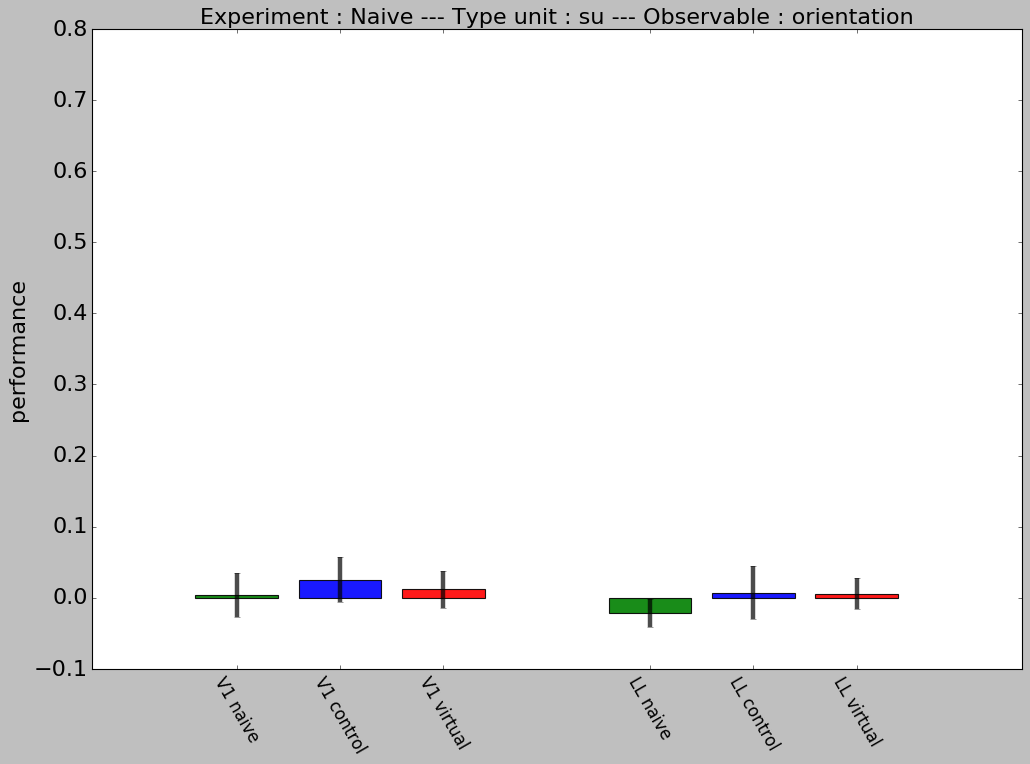

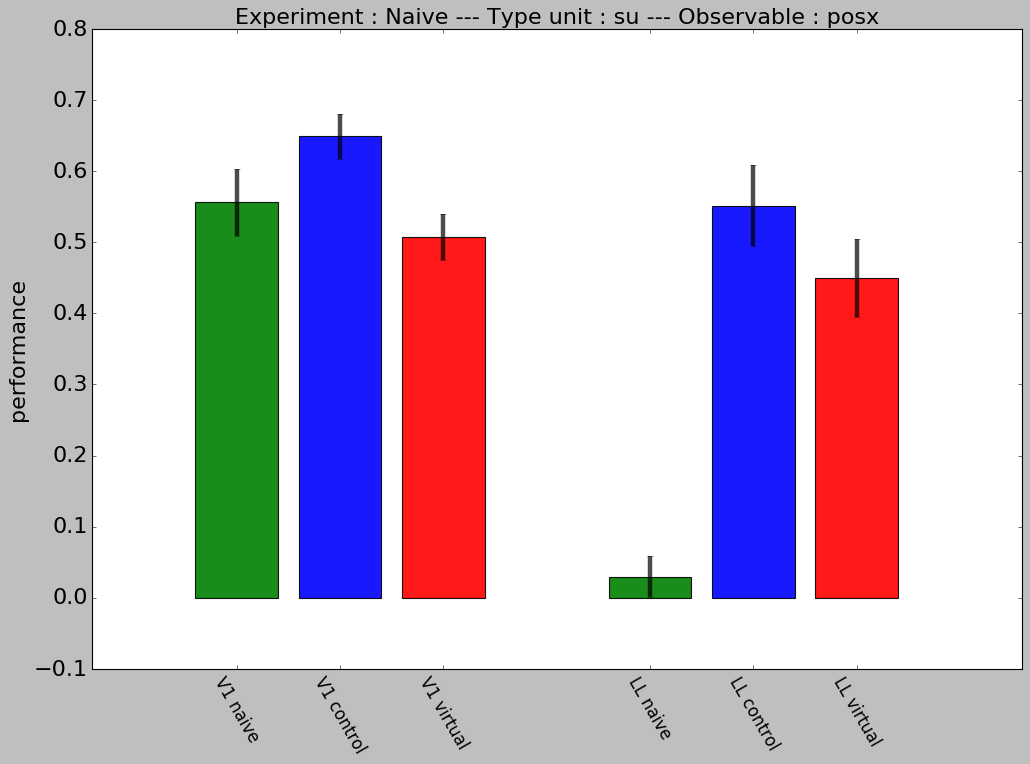

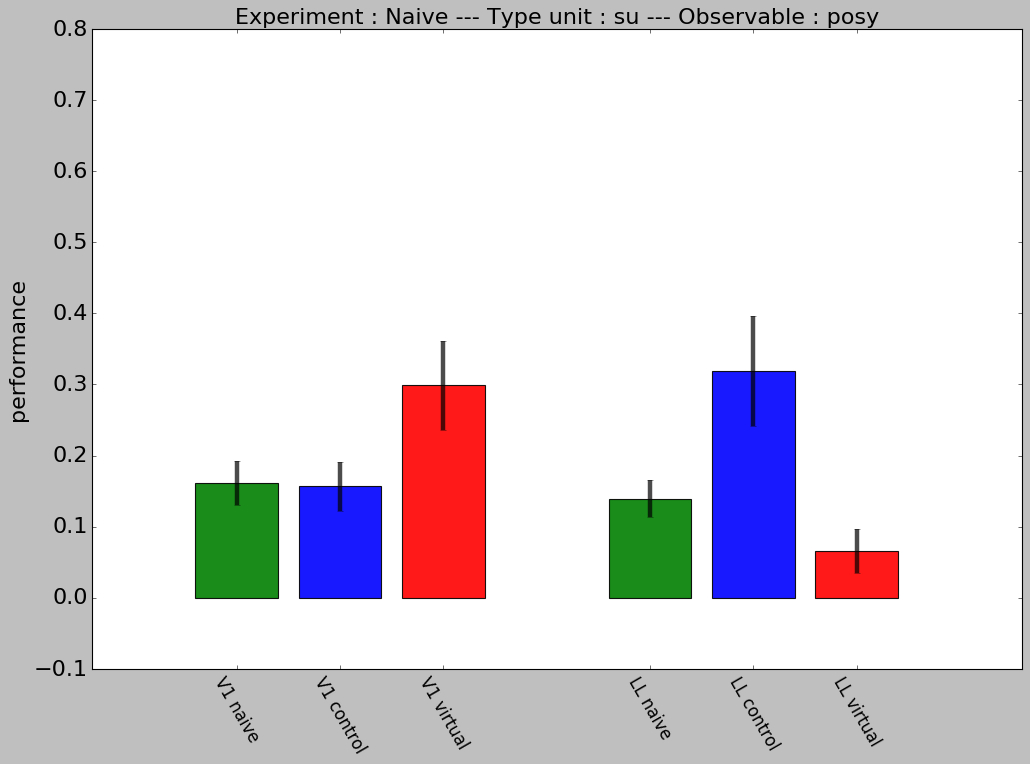

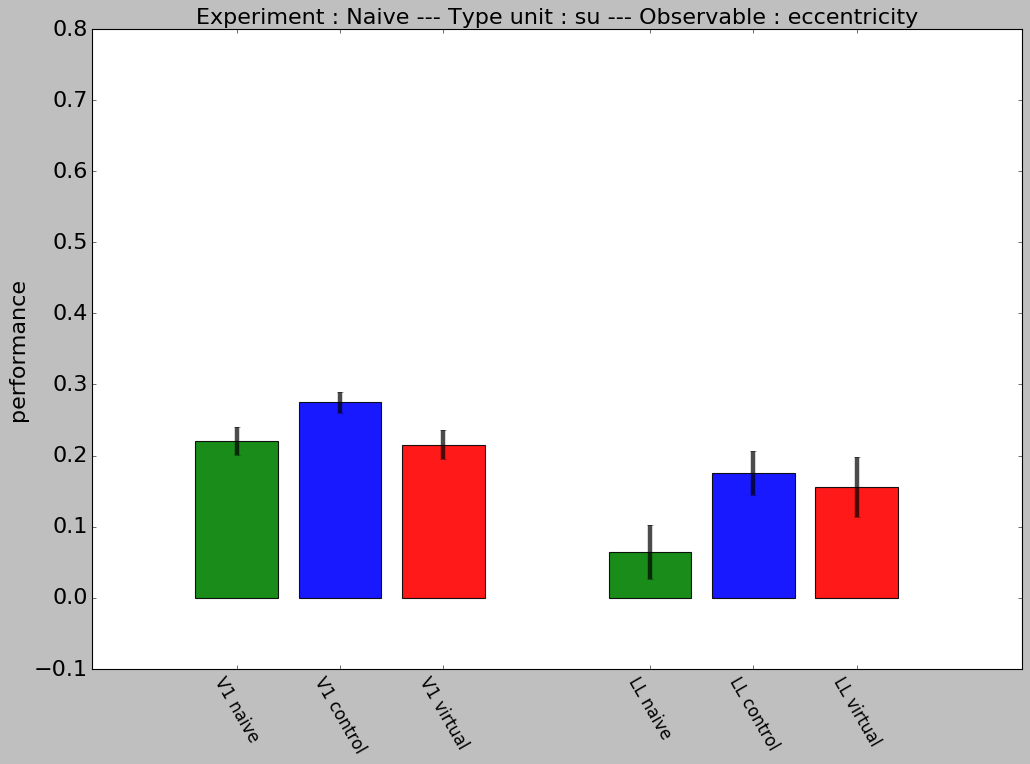

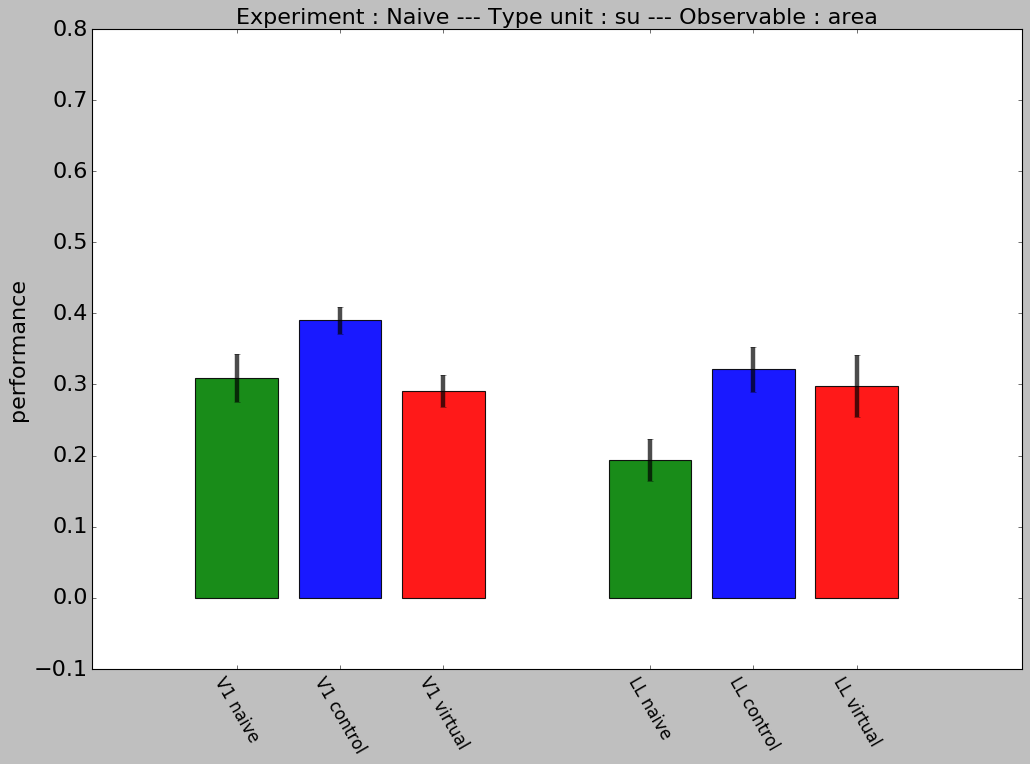

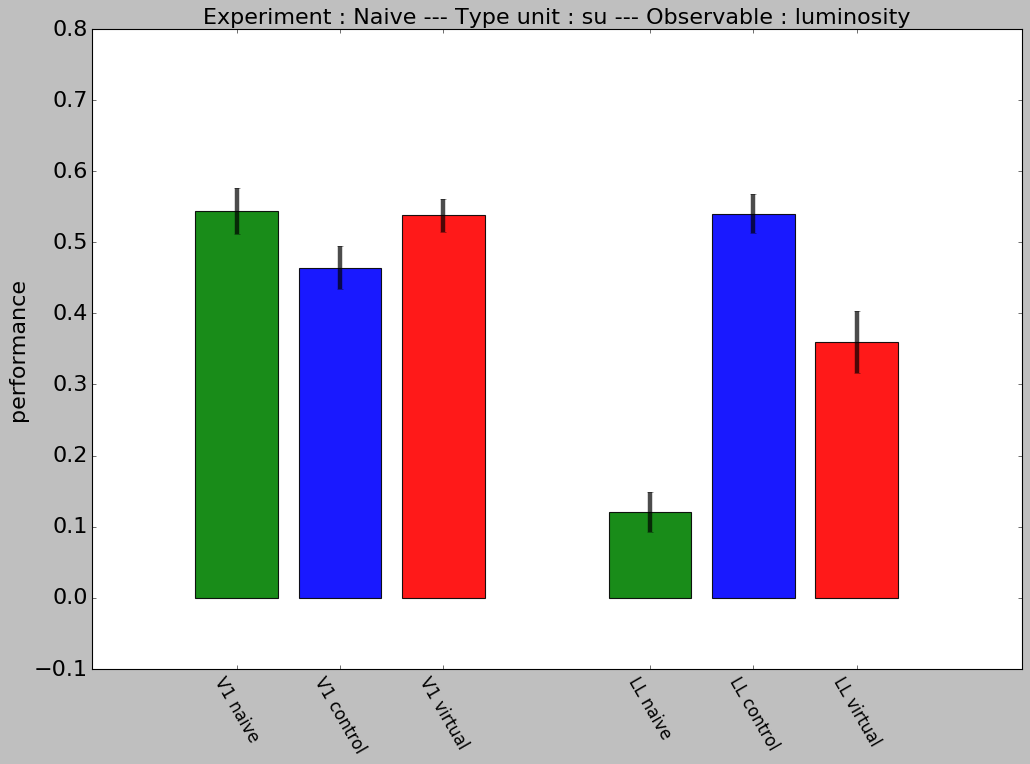

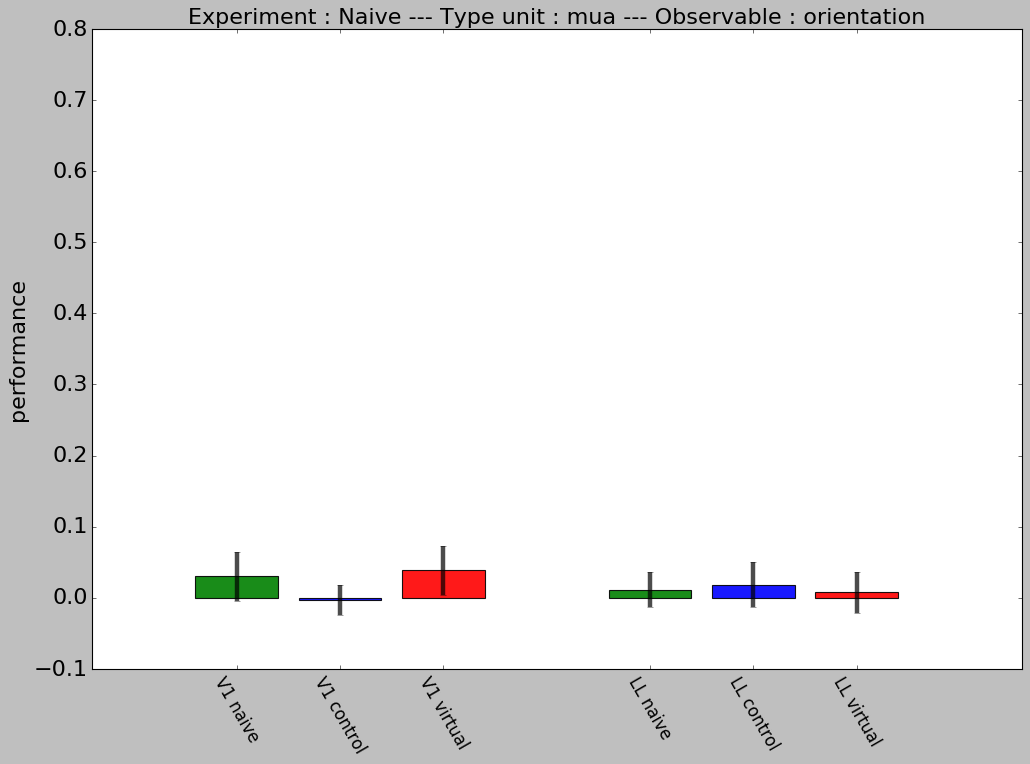

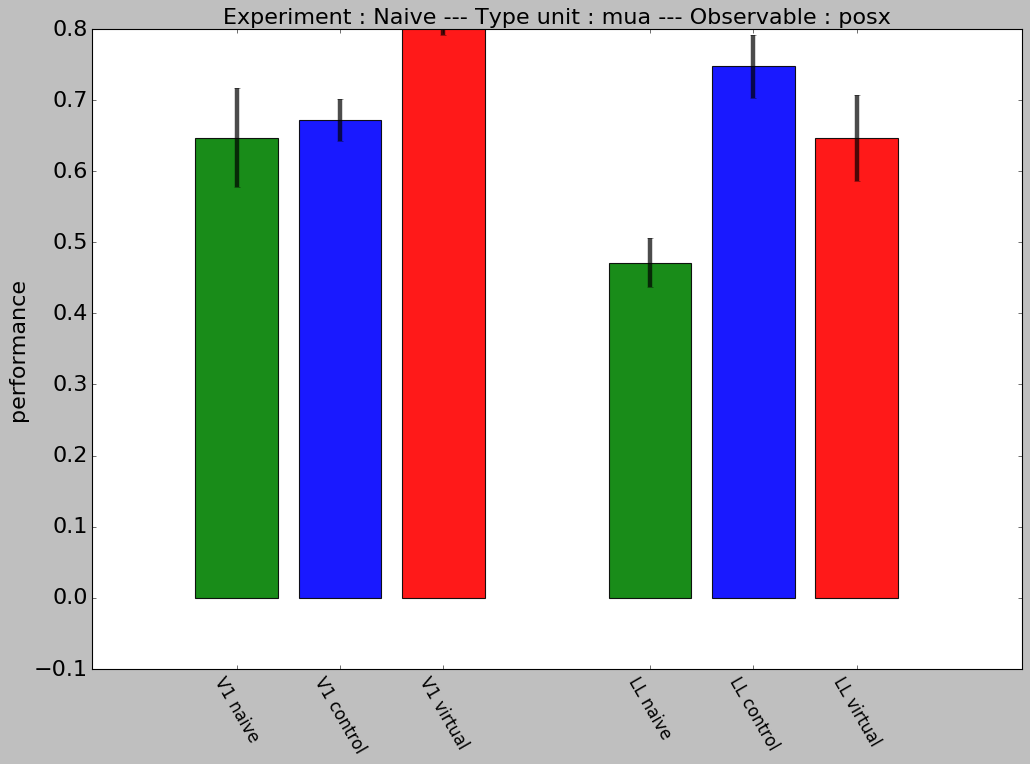

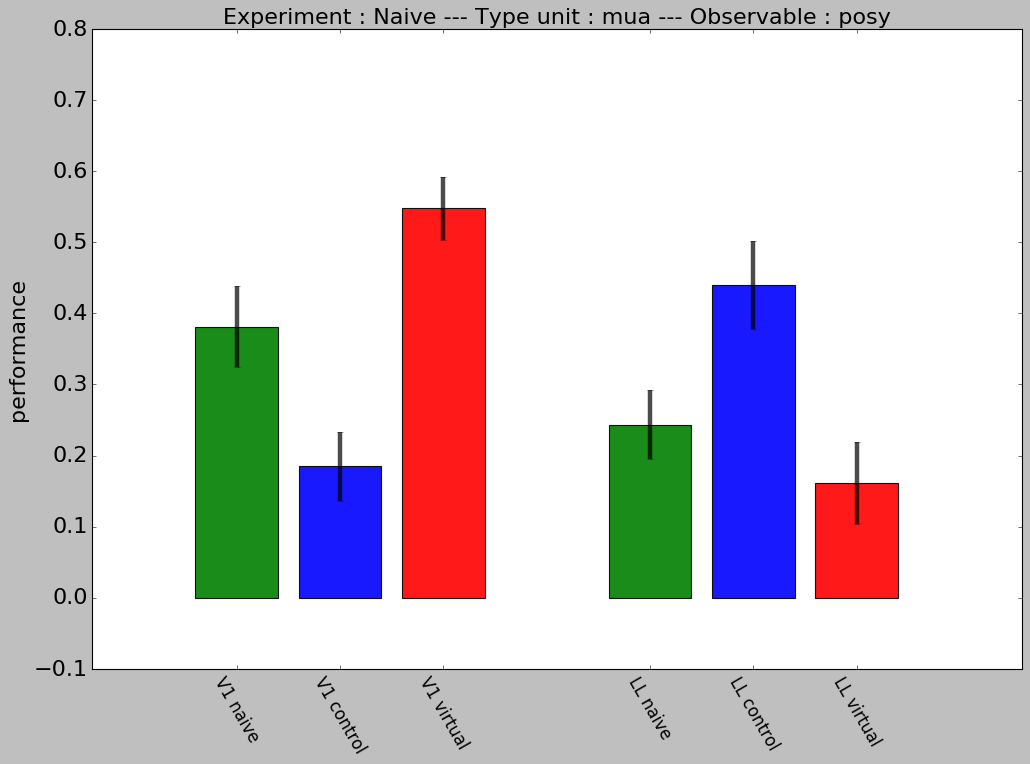

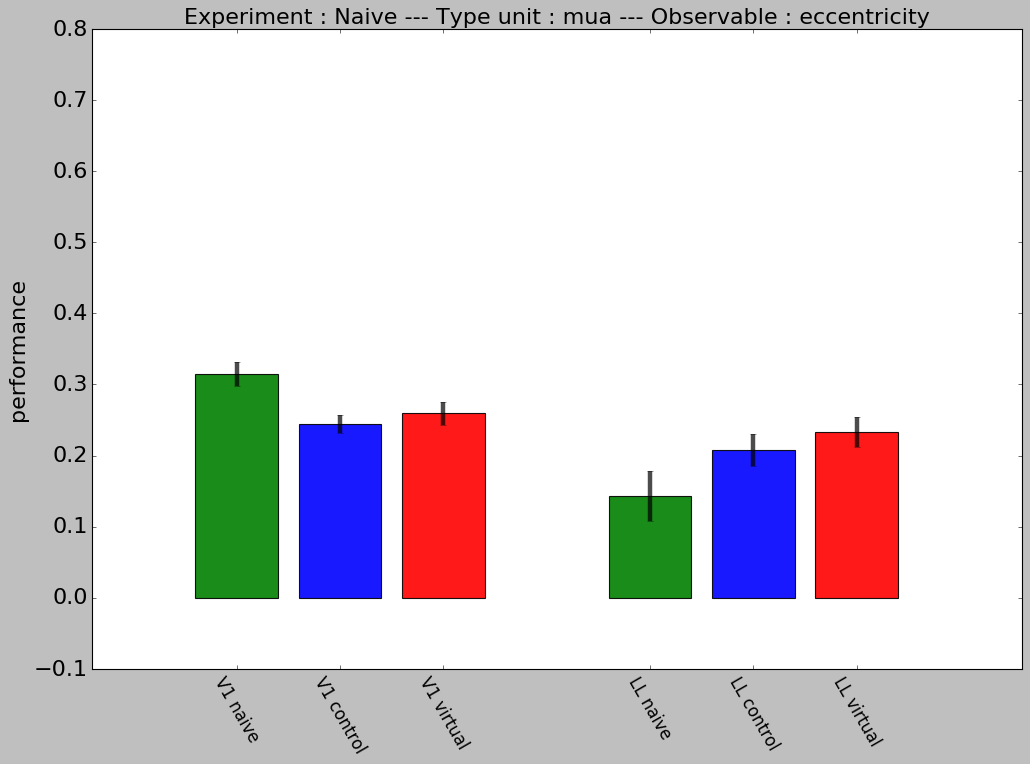

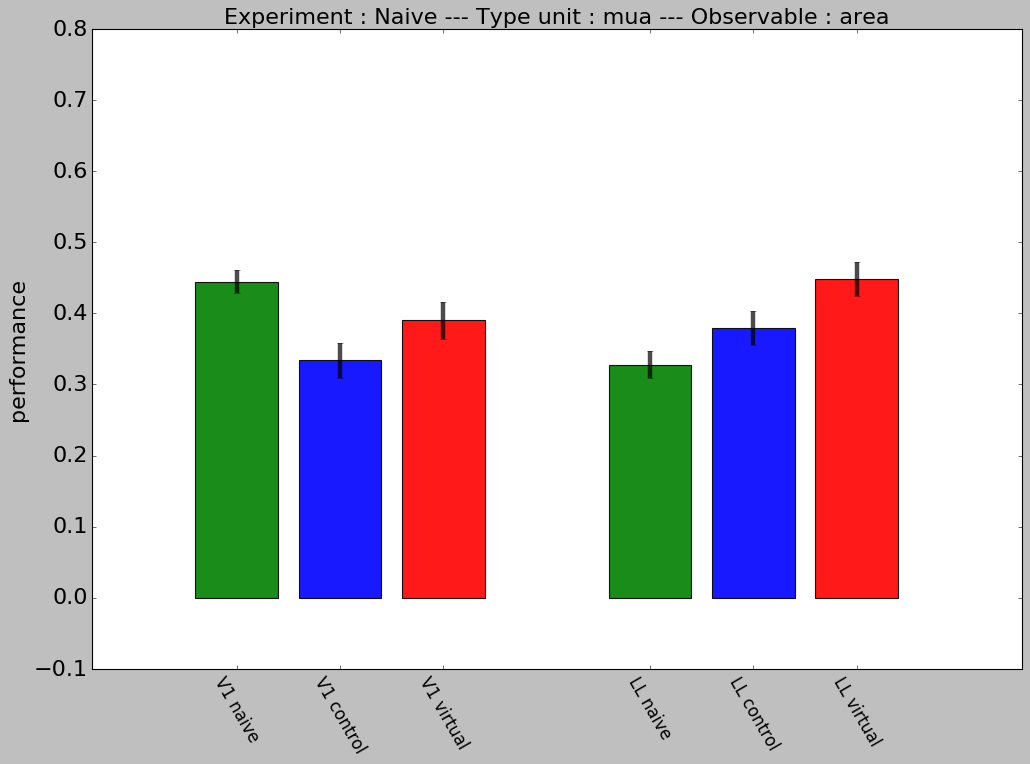

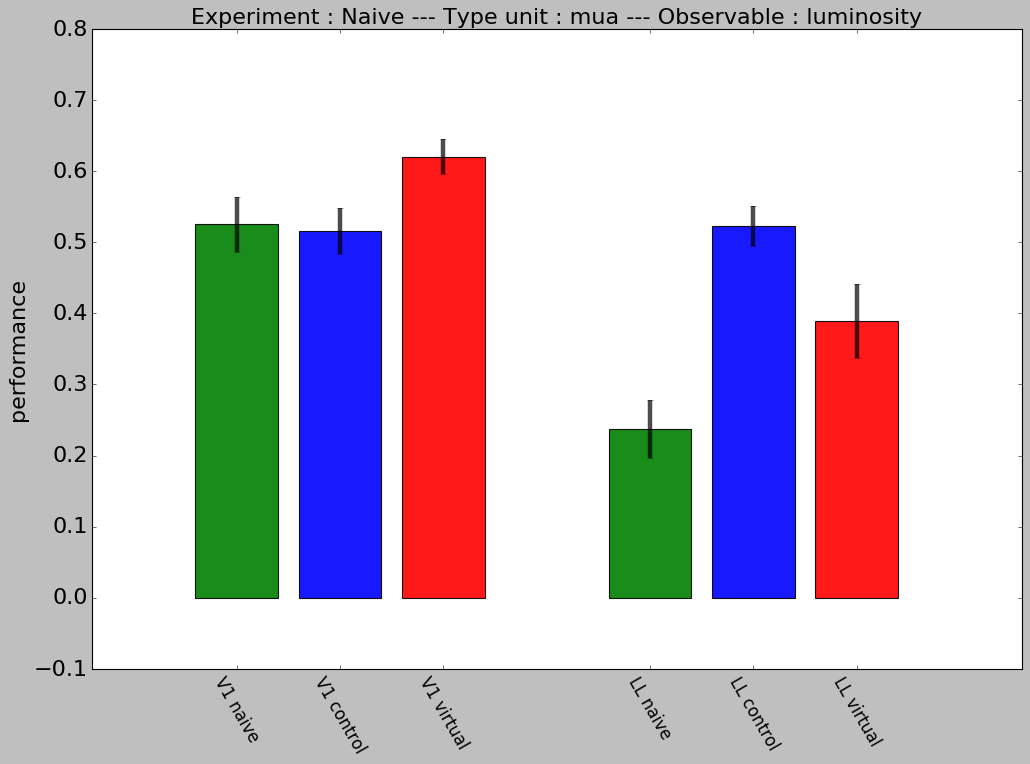

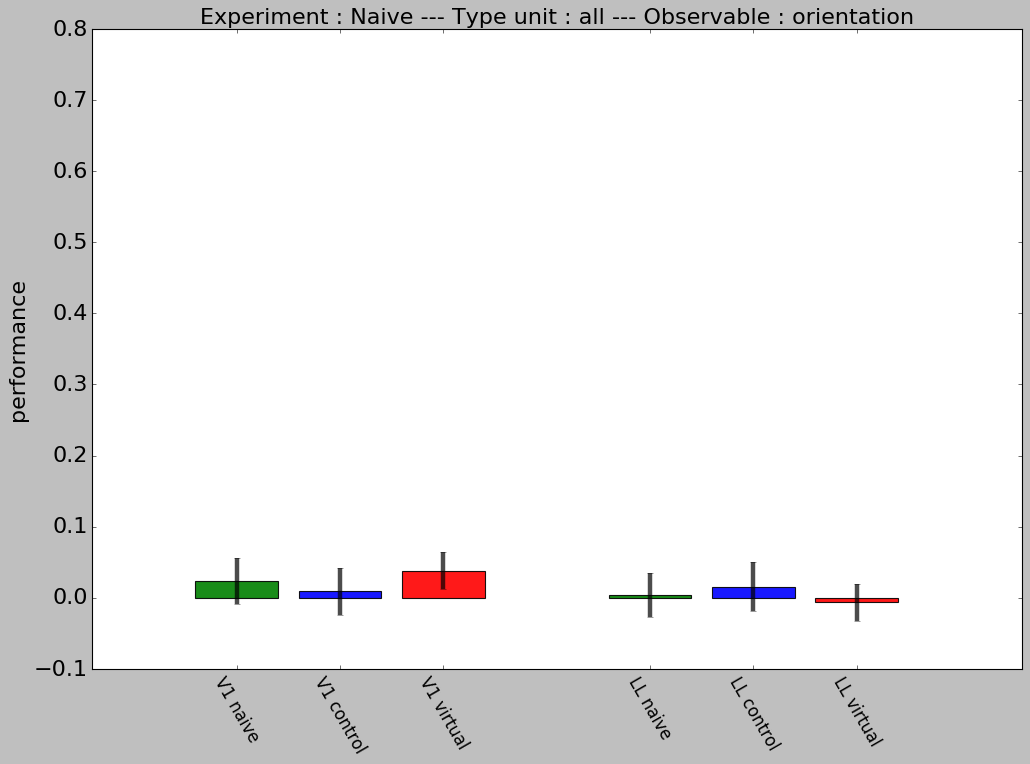

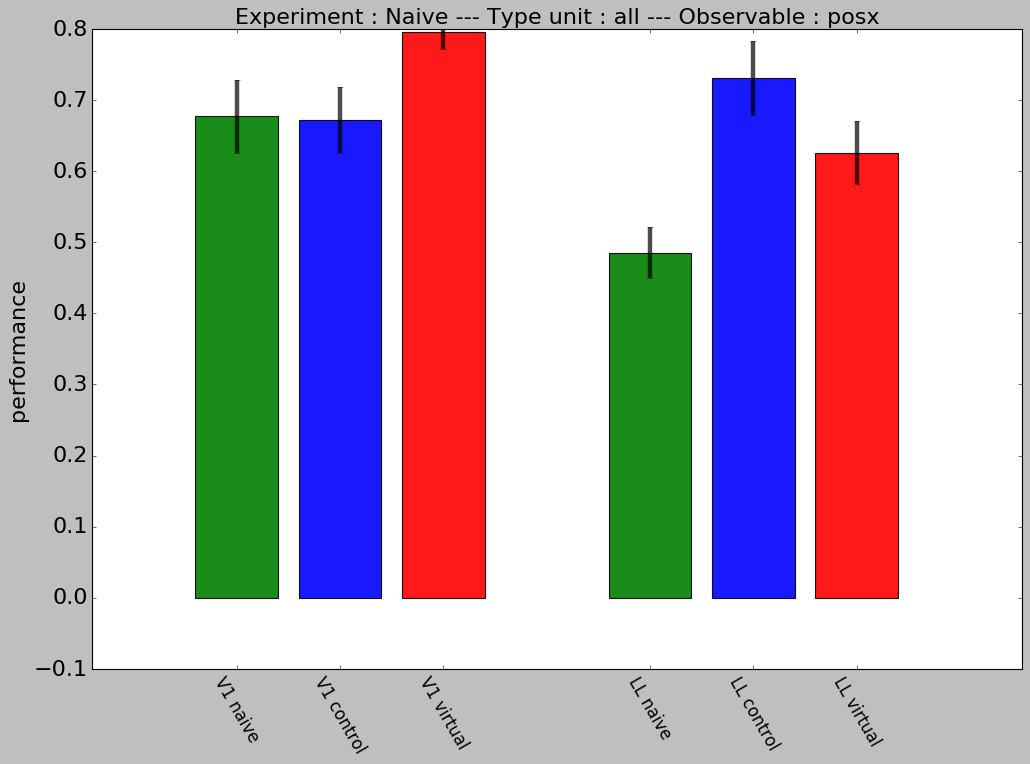

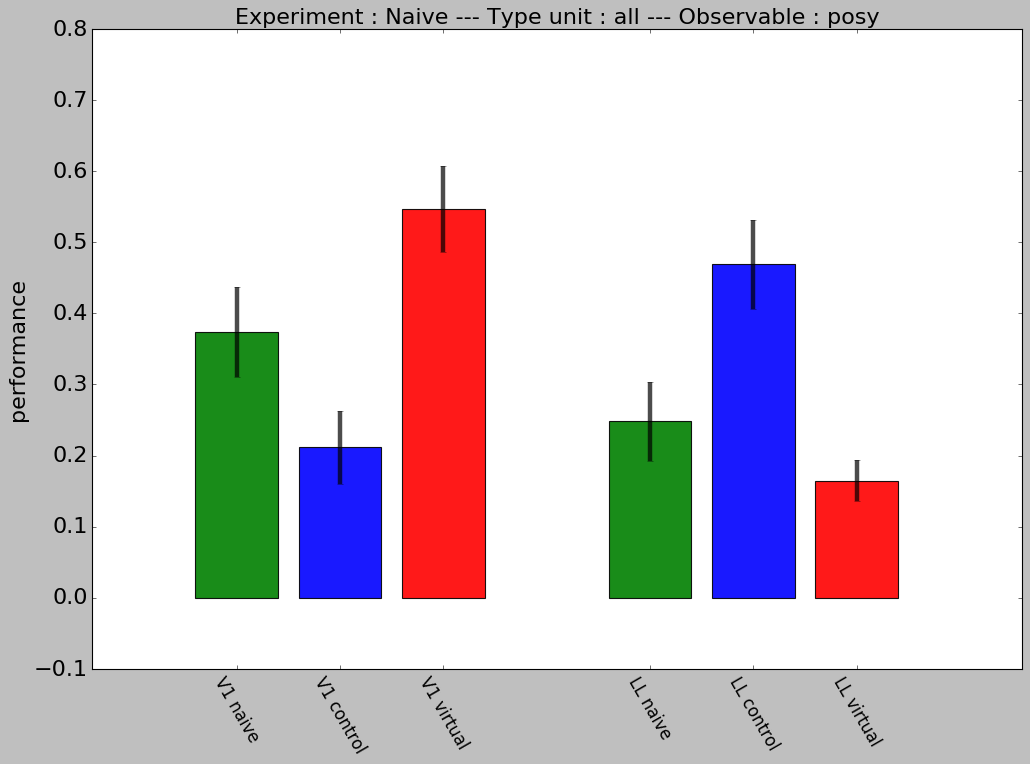

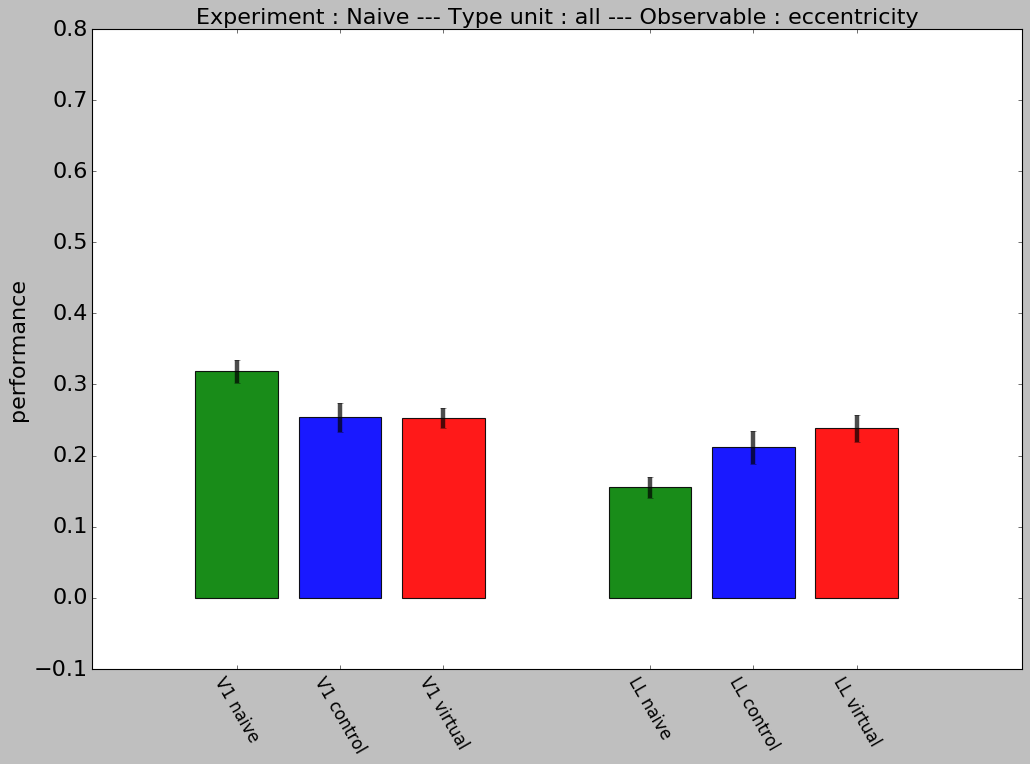

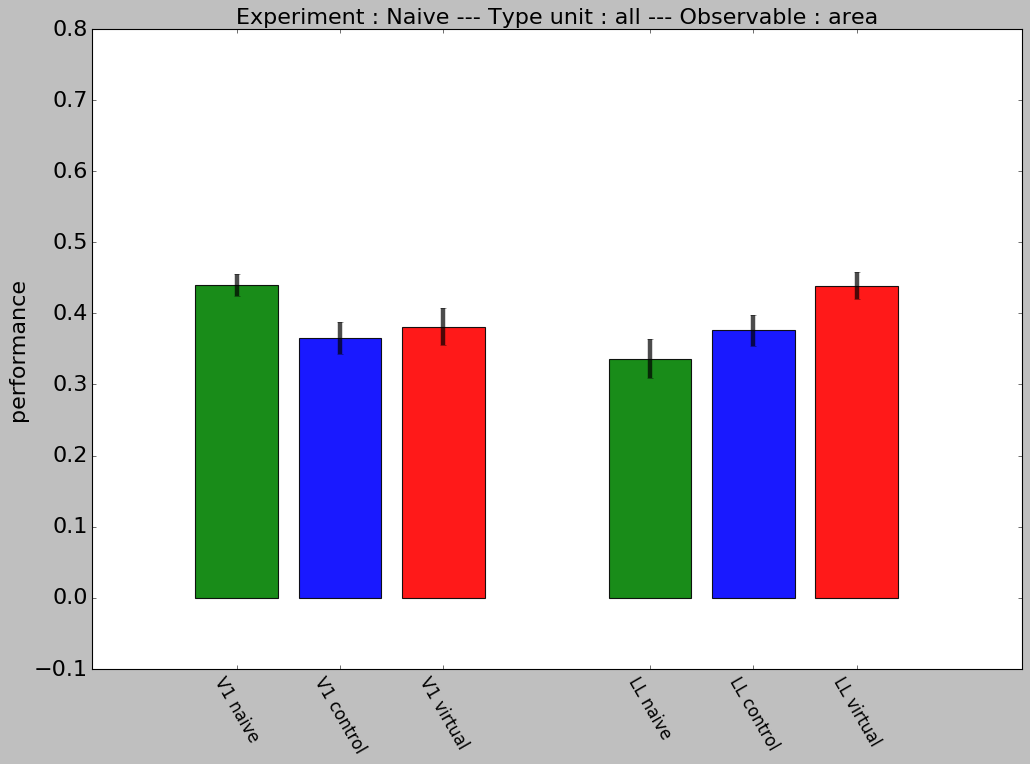

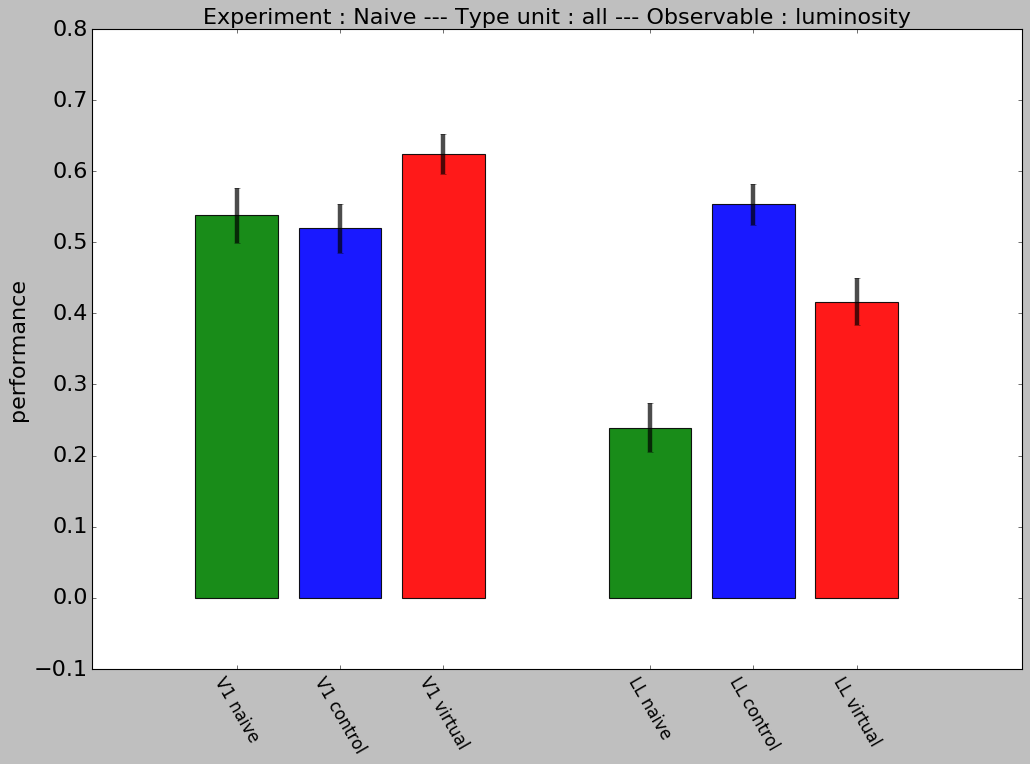

In [19]:
for typeunit in TypeUnits:
    for obs in stimFeatures.keys():
        #print(obs)
        Perf = []
        Perferr = []
        for area in TargetAreas:
            #print(area)

            perf = []
            perferr = []
            for exp in Experiments:                             
                R = pickle.load(open(join(ROOT,
                         'notebooks',
                         'results', date,
                          exp + '_' + area + '_' + typeunit + '_' + obs + '.p'), 'rb' ) )
                rs = [pearsonr(r[2],r[3])[0] for r in R]
                mean_r = np.mean(rs)
                std_r = np.std(rs)

                perf.append(mean_r)
                perferr.append(std_r)
                #print(mean_r,std_r)   
            Perf.append(perf)
            Perferr.append(perferr)
            #print('')
        Perf = np.array(Perf)
        Perferr = np.array(Perferr)


        fig=plt.figure(figsize=(15,10))

        for i in range(3):
            plt.errorbar(positions[i] + 0.4,Perf[0,i],
                         yerr=Perferr[0,i],color='k',
                         linewidth=lw,alpha=alpha2)
            plt.bar(positions[i],Perf[0,i], color=colors[i],alpha=alpha)

        for i in range(3):
            plt.errorbar(positions[i+3] + 0.4,Perf[1,i],
                         yerr=Perferr[1,i],color='k',
                         linewidth=lw,alpha=alpha2)
            plt.bar(positions[i+3],Perf[1,i], color=colors[i],alpha=alpha)


        plt.xlim([0,9])
        plt.ylim([-0.1,0.8])
        plt.ylabel('performance',fontsize=fs)
        plt.yticks(fontsize=fs)
        plt.xticks(positions + 0.4,ticksLabels,rotation=-60,fontsize=15)
        plt.title('Experiment : {} --- Type unit : {} --- Observable : {}'.format(exp,typeunit,obs),fontsize=fs )

        figname =  typeunit + '_' + obs +  '.png'
        plt.savefig(join(figs_folder, figname ) )    